# Modelo usando pytorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
data = torch.from_numpy(np.loadtxt('data/age_data_3.txt')).to(torch.float32)
inputs, targets = data.T

## Camada linear do pytorch

In [5]:
from torch import nn
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.7690]], requires_grad=True)
Parameter containing:
tensor([-0.6064], requires_grad=True)


A camada Linear do pytorch espera um tensor com 2 dimensõe: [batch, numero de atributos]

In [17]:
inputs = inputs.reshape(len(inputs), 1)

targets = targets.reshape(len(targets), 1)
with torch.no_grad():
    scores = model(inputs)
    scores_test = model.weight*inputs + model.bias
print(scores[:10])
print(scores_test[:10])


print(inputs.shape)
print(targets.shape)

tensor([[-1.6676],
        [-1.5600],
        [-1.6061],
        [-1.6984],
        [-1.6753],
        [-1.4523],
        [-1.6061],
        [-1.5138],
        [-1.5215],
        [-1.5600]])
tensor([[-1.6676],
        [-1.5600],
        [-1.6061],
        [-1.6984],
        [-1.6753],
        [-1.4523],
        [-1.6061],
        [-1.5138],
        [-1.5215],
        [-1.5600]])
torch.Size([200, 1])
torch.Size([200, 1])


In [18]:
def train(model, inputs, targets, lr, num_epochs):
    loss_func = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(model.parameters(), lr=lr)
    losses = []

    for epoch in range(num_epochs):
        optim.zero_grad()
        scores = model(inputs)
        loss = loss_func(scores, targets)
        loss.backward()
        optim.step()
        losses.append(loss.item())

    return losses

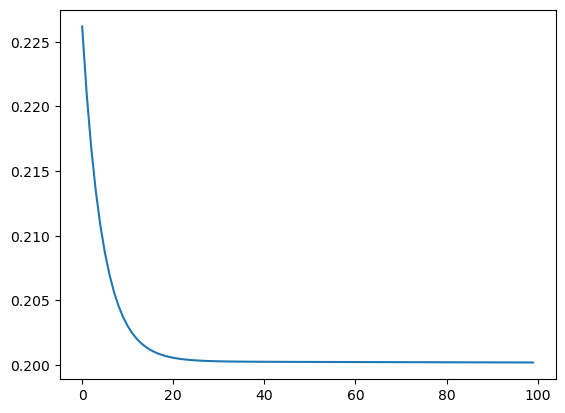

In [19]:
with torch.no_grad():
    model.weight[:] = 19.
    model.bias[:] = -25.

losses = train(model, inputs, targets, lr=0.5, num_epochs=100)
plt.plot(losses)